# Amazon Reviews and Ratings DB - A Comprehensive Analysis

In this notebook we will be documenting our analysis of the Amazon Reviews and Ratings DB.
We will describe how we overcome the obstacles of the huge amounts
of data and demonstrate some of the findings.


*The data*

Our dataset is the Amazon products reviews dataset that was released by Amazon and can be found [here](http://jmcauley.ucsd.edu/data/amazon/links.html). At this point I want to thank Julian McAuley, assistant professor at UCSD, for supporting that project.

### Getting started

Some necessary imports

In [1]:
import os
import io
import numpy as np
import pandas as pd
import gzip

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

## REVIEWS



### Preprocessing

Each reviews file had to be preprocessed prior to the grouping by month stage.
That included:

**A)** Form a loop that iterate through evry csv file and inserting it to a dictionary.

Than, per every 'key':

**B)** Calculate the 'helpfulness_range' feature and remove empty obsevations.

**C)** Extract the date and time of the review from the Unix timestamp format and convert it to a mm-yyyy format.

In [ ]:
# A)
files_list = []
for file in os.listdir(path):
    if file[-3:] == 'csv':
        files_list.append(file)
    else:
        continue
d = {}
for name in files_list:
    d[name[:-4]] = pd.read_csv(path + '\\' + name)

In [ ]:
# B)
for value, key in d.items():
    key['helpful_numerator'] = key['helpful'].apply(lambda x: list(x)[0])
    key['helpful_denominator'] = key['helpful'].apply(lambda x: list(x)[1])
    key['helpful%'] = np.where(key['helpful_denominator'] > 0,
                               key['helpful_numerator'] / key['helpful_denominator'], -1)
    key['helpfulness_range'] = pd.cut(x=key['helpful%'], bins=[-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0],
                                      labels=['empty', '1', '2', '3', '4', '5'], include_lowest=True)
    key = key[key['helpfulness_range'] != 'empty']

In [ ]:
# C)
for value, key in d.items():
    key['date'] = key['unixReviewTime'].apply(lambda x: datetime.datetime.fromtimestamp(x))
    key['month_year'] = pd.to_datetime(key['date']).dt.to_period('M')

Next will be the grouping stage:

**A)** Group by month_year.

**B)** Generate a DataFrame with the value counts.

**C)** Merge the two and export in the desired format.

In [ ]:
# A)
for value, key in d.items():
    df1 = pd.DataFrame(key.groupby(key['month_year'])['helpfulness_range'].mean())
    df1.reset_index(inplace=True)

In [ ]:
# B)
for value, key in d.items():
    df2 = pd.DataFrame(key['month_year'].value_counts())
    df2.reset_index(inplace=True)

In [ ]:
# C)
for value, key in d.items():
    df1 = pd.merge(df1, df2, right_on='index', left_on='month_year')
    df1['month_year'] = df1['month_year_x']
    df1['count'] = df1['month_year_y']
    df1.drop(['month_year_x', 'index', 'month_year_y'], axis=1, inplace=True)
    df1.to_csv(value)

That will yeald a set of files that looks like this:

In [17]:
path = "C:\\Users\\byyre\\Desktop\\Projects\\Time Series Project\\after cloud conversion"
df = pd.read_csv(path + '\\' + 'reviews_Movies_and_TV.csv')
print(df)

    month_year  helpfulness_range  count
0      1997-08           3.666667      3
1      1997-09           4.000000      2
2      1997-10           4.333333      6
3      1997-11           3.571429     14
4      1997-12           4.500000     12
5      1998-01           4.416667     12
6      1998-02           4.411765     17
7      1998-03           4.285714     14
8      1998-04           4.120000     25
9      1998-05           4.481481     27
10     1998-06           4.291667     48
11     1998-07           4.428571     49
12     1998-08           4.266667     60
13     1998-09           4.145455     55
14     1998-10           4.185185     54
15     1998-11           4.247911    359
16     1998-12           4.185754    716
17     1999-01           4.246338    751
18     1999-02           4.159357    684
19     1999-03           4.122396    768
20     1999-04           4.187430    891
21     1999-05           4.122093    860
22     1999-06           4.084764    932
23     1999-07  

The last part will be to merge all of the files into one:

In [ ]:
for value, key in d.items():
    final_df = years_index.merge(key, on='month_year', how='outer') # years_index is just a list of mm-yyyy dates.

final_df.to_csv('final_reviews_df.csv')

## RATINGS



### Preprocessing

The ratings came on one big file. We preprocessed it and than grouped it following these steps:

**A)** Loading the file and naming the columns.

**B)** Extract the date and time of the review from the Unix timestamp format and convert it to a mm-yyyy format.

**C)** Group by month_year.

**D)** Generate a DataFrame with the value counts.

**E)** Merge the two and export in the desired format.

In [ ]:
# A)
all_ratings = pd.read_csv('item_dedup.csv')
all_ratings.columns = ['user', 'item', 'rating', 'unixReviewTime']

In [ ]:
# B)
all_ratings['date'] = all_ratings['unixReviewTime'].apply(lambda x: datetime.datetime.fromtimestamp(x))
all_ratings['month_year'] = pd.to_datetime(all_ratings['date']).dt.to_period('M')

In [ ]:
# C)
df1 = pd.DataFrame(all_ratings.groupby(all_ratings['month_year'])['rating'].mean())
df1.reset_index(inplace=True)

In [ ]:
# D)
df2 = pd.DataFrame(all_ratings['month_year'].value_counts())
df2.reset_index(inplace=True)

In [ ]:
# E)
df1 = pd.merge(df1, df2, right_on='index', left_on='month_year')
df1.to_csv('ratings.csv')

That will yeald a set of files that looks like this:

In [6]:
path = "C:\\Users\\byyre\\Desktop\\Projects\\Time Series Project\\ratings and reviews"
df = pd.read_csv(path + '\\' + 'ratings.csv')
print(df)

    month_year    rating    count
0      1996-05  4.500000        2
1      1996-06  3.666667        3
2      1996-08  5.000000        1
3      1996-09  5.000000        1
4      1996-11  3.642857       14
5      1996-12  4.750000       20
6      1997-01  4.111111        9
7      1997-02  4.500000        8
8      1997-03  3.916667       12
9      1997-04  4.111111       18
10     1997-05  4.680000       25
11     1997-06  4.361111       36
12     1997-07  4.302326       43
13     1997-08  4.405349     1907
14     1997-09  4.389269     1901
15     1997-10  4.465795     3289
16     1997-11  4.454051     3123
17     1997-12  4.472748     3541
18     1998-01  4.431236     4450
19     1998-02  4.424730     3421
20     1998-03  4.443368     4953
21     1998-04  4.453122     5429
22     1998-05  4.463493     5903
23     1998-06  4.448140     7848
24     1998-07  4.420114     9138
25     1998-08  4.384308     7762
26     1998-09  4.446167     6836
27     1998-10  4.425600     8078
28     1998-11

The **first** problem was that the files were too big for my machine to handle.

It occurred to me that this was a great opportunity to exercise the use of cloud services.

Google cloud was chosen at random.

## Working with Google Cloud

I created a VM instance that uses Ubuntu and crazy amounts of memory (they are offering 300$ free credit so why not?).
Everything about installation, connecting to the instance and transfering files I found on-line. Basically the Google Cloud documentation and youtube videos. Try [this](https://www.youtube.com/watch?v=chk2rRjSn5o&vl=en) for example.

### Basic steps

**A)** Download Putty and WinSCP.

**B)** Connect to the instace through SSH key and your personal authentication.

**C)** Type "sudo su" + Enter to go to home directory where you probably have the most credentials.

**D)** Your machine will probably come with python. If not, or if you want to make 3.6 your default, check [this](http://ubuntuhandbook.org/index.php/2017/07/install-python-3-6-1-in-ubuntu-16-04-lts/).

**E)** Type nano + your file name here + .py to create a new python file.
       Writing there can be exhausting so I recommend to use pycharm or any other IDE and than just paste back the code.

**F)** Transfer files to your home directory using the WinSCP intuitive interface.

**G)** Run the python file containing the loops from above by typing python + your file name.
       It took the machine just over four hours to run all of these calculations and export the desired files.

The **second** problem was that the book reviews json file was to big to read. It was almost 20 GB and it coused a memory problem. It had to be read by chunks.

The following code will do the trick:

In [ ]:
# read json in chunks
reader = pd.read_json('book_reviews.json', lines=True, chunksize=1)
reviewerID = []
asin = []
helpful = []
unixReviewTime = []
for chunk in reader:
    reviewerID.append(chunk['reviewerID'].values[0])
    asin.append(chunk['asin'].values[0])
    helpful.append(chunk['helpful'].values[0])
    unixReviewTime.append(chunk['unixReviewTime'].values[0])

# creating a dataframe of the four lists
df = pd.DataFrame({'reviewerID': reviewerID,
                    'asin': asin,
                    'helpful': helpful,
                    'unixReviewTime': unixReviewTime})

# ANALYSIS



Building our DataFrame for analysis

In [12]:
# Get the ratings and reviews data from above
df1 = pd.read_excel('C:\\Users\\byyre\\Desktop\\Projects\\Time Series Project\\ratings_reviews.xlsx')
print(df1)

    month_year    rating  helpfulness  total_count
1      1997-07  4.302326     4.142857         3571
2      1997-08  4.405349     4.333333         3551
3      1997-09  4.389269     4.166667         6172
4      1997-10  4.465795     4.566667         5838
5      1997-11  4.454051     4.365079         6626
6      1997-12  4.472748     3.737500         8309
7      1998-01  4.431236     3.190705         6411
8      1998-02  4.424730     4.303922         9289
9      1998-03  4.443368     4.423701        10070
10     1998-04  4.453122     4.637366        10375
11     1998-05  4.463493     4.570934        12943
12     1998-06  4.448140     4.618423        14998
13     1998-07  4.420114     4.449086        12755
14     1998-08  4.384308     4.540542        11014
15     1998-09  4.446167     4.504275        13148
16     1998-10  4.425600     4.426236        13704
17     1998-11  4.463721     4.631956        14815
18     1998-12  4.445080     4.376377        16521
19     1999-01  4.414079     4.

In [3]:
# Get the data about Amazon's stock at the relevant dates
import fix_yahoo_finance as yf

data = yf.download('AMZN', '1997-08-01', '2014-07-01')
data['month_year'] = data.index.to_period('M')
grouped = data.groupby(data['month_year'])['Close'].mean()

[*********************100%***********************]  1 of 1 downloaded


In [4]:
# Create the final DataFrame by combining the Series and DataFrame from above
ansys_df = pd.DataFrame({'month_year': df1['month_year'],
                         'rating': df1['rating'],
                         'helpfulness': df1['helpfulness'],
                         'total_count': df1['total_count'],
                         'amazon': grouped.values})
print(ansys_df)

    month_year    rating  helpfulness  total_count      amazon
1      1997-07  4.302326     4.142857         3571    2.395833
2      1997-08  4.405349     4.333333         3551    2.231399
3      1997-09  4.389269     4.166667         6172    3.492560
4      1997-10  4.465795     4.566667         5838    4.267437
5      1997-11  4.454051     4.365079         6626    4.378564
6      1997-12  4.472748     3.737500         8309    4.563210
7      1998-01  4.431236     3.190705         6411    4.803906
8      1998-02  4.424730     4.303922         9289    5.297423
9      1998-03  4.443368     4.423701        10070    6.733723
10     1998-04  4.453122     4.637366        10375    7.633929
11     1998-05  4.463493     4.570934        12943    7.474609
12     1998-06  4.448140     4.618423        14998   11.545455
13     1998-07  4.420114     4.449086        12755   19.792140
14     1998-08  4.384308     4.540542        11014   19.954489
15     1998-09  4.446167     4.504275        13148   15

## DATA VISUALIZATION


**Reviews' helpfulness rate**

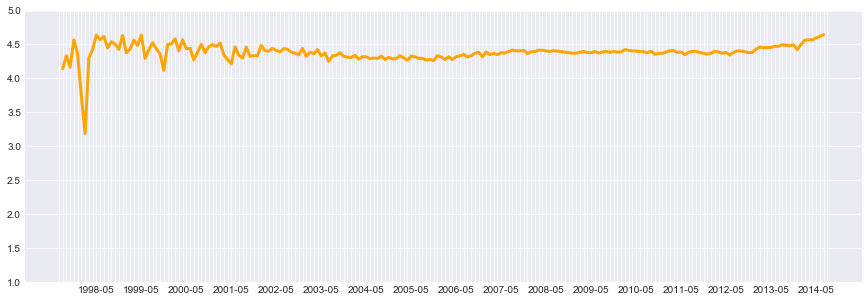

In [47]:
plt.figure(figsize=(15,5))
ansys_df['helpfulness'].plot(color='orange', linewidth=3)
plt.xticks(range(206), ansys_df['month_year'].apply(lambda x: x if x[-2:] == '05' else ""))
plt.ylim(1,5) # that line can be toggeled on\off
plt.show()

**Ratings' helpfulness rate**

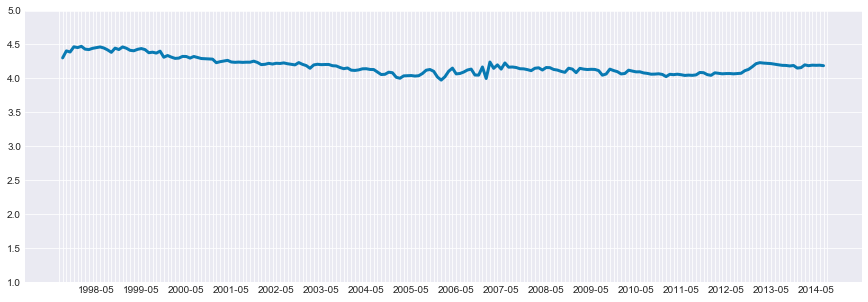

In [57]:
plt.figure(figsize=(15,5))
ansys_df['rating'].plot(color='#097ab3', linewidth=3)
plt.xticks(range(206), ansys_df['month_year'].apply(lambda x: x if x[-2:] == '05' else ""))
plt.ylim(1,5) # that line can be toggeled on\off
plt.show()

**Amazon's stock price**

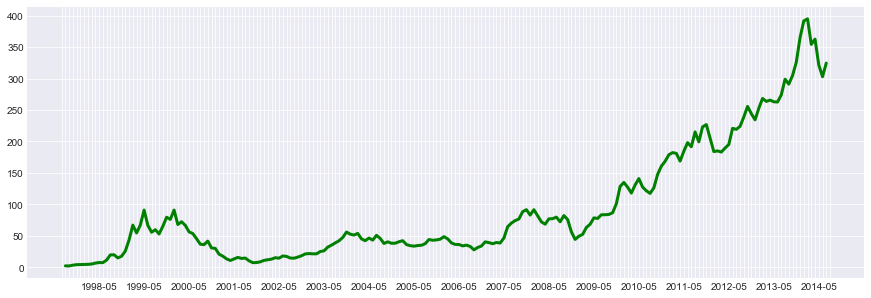

In [49]:
plt.figure(figsize=(15,5))
ansys_df['amazon'].plot(color='g', linewidth=3)
plt.xticks(range(206), ansys_df['month_year'].apply(lambda x: x if x[-2:] == '05' else ""))
plt.show()

**Combination**

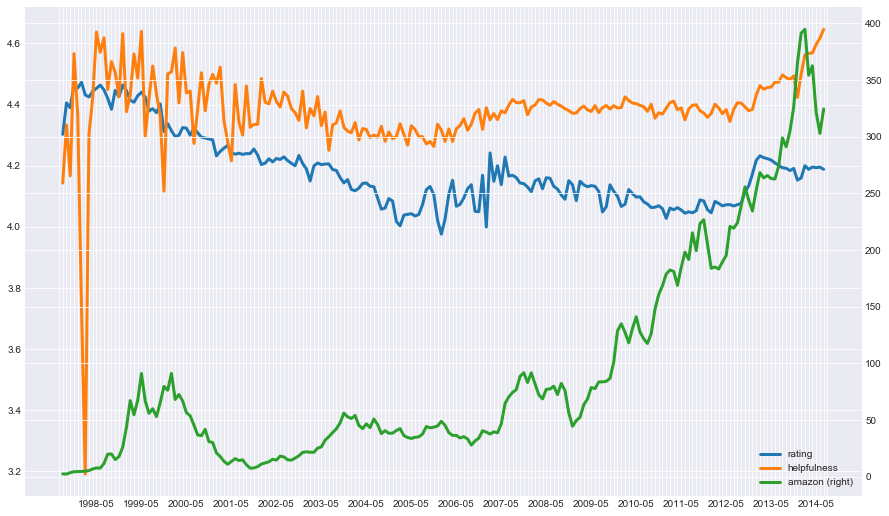

In [6]:
ansys_df.drop('total_count', axis=1).plot(secondary_y=['amazon'], grid=True, linewidth=3, figsize=(15,9))
plt.xticks(range(206), ansys_df['month_year'].apply(lambda x: x if x[-2:] == '05' else ""))
plt.show()

# CONCLUSION


So as it turns out the connection between ratings of products, helpfulness of reviews and Amazon's stock price is weak at best. After viewing [this article](http://faculty.washington.edu/shevlin/gomez.pdf) I acted under the assumption that some sort of a connection will be found.

But, it wasn't all for nothing. I learned a lot of new stuff during the process, such as using cloud platforms to to study big data.
That allowed me to find this nice insight (although it is more of a gimmick)-

___Below the development of Amazon's brand value against the increase in the number of ratings&reviews:___

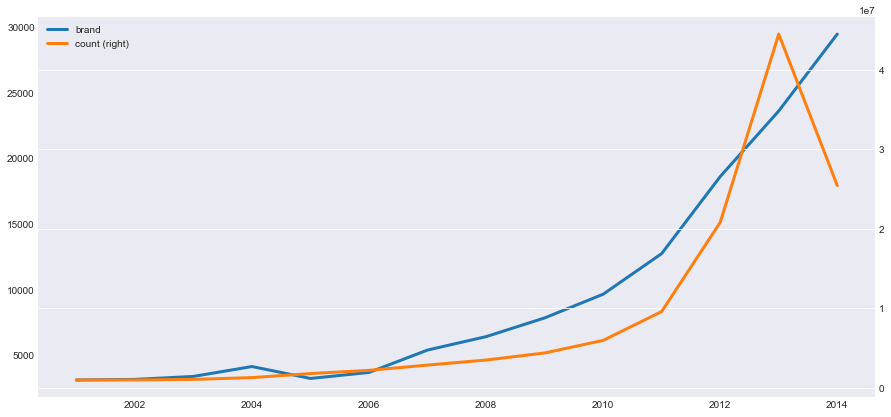

In [86]:
# The source is interbrand.com >>> https://www.interbrand.com/best-brands/best-global-brands/2017/ranking/amazon/

d = {'2001': 3130, '2002': 3175, '2003': 3403, '2004': 4156, '2005': 3248, '2006': 3707, '2007': 5411,
     '2008': 6434, '2009': 7858, '2010': 9665, '2011': 12758, '2012': 18625, '2013': 23620, '2014': 29478}

brand = pd.DataFrame.from_dict(d, orient='index')

years_count = df1.groupby(by=df1['month_year'].apply(lambda x: x[:4]))['total_count'].sum()
years_count.drop(labels=['1997', '1998', '1999', '2000'], inplace=True)

df1 = pd.DataFrame(brand.values, columns=['brand'] ,index=range(2001, 2015))
df1['count'] = years_count.values

df1.plot(secondary_y=['count'], linewidth=3, figsize=(15,7))
plt.show()

Notice the peak on 2013. Further analysis will show that this happened on November of that year. Two major events support these findings. The first one is that on that month, Amazon began to offer Sunday delivery option for purchases. [See news article here](https://www.cnet.com/news/amazon-to-begin-offering-sunday-delivery-option-for-purchases/). That surely resulted in lots of new members and new ratings&reviews. The second one is obviously black friday...